In [347]:
#Import Modules

In [348]:
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [349]:
#Load, View, Missing Value Data

In [350]:
ldata = pd.read_csv('df1_loan.csv')

In [351]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [352]:
ldata.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [353]:
l_data= ldata.dropna()

In [354]:
l_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0


In [355]:
#Drop useless columns and turn catergorical features into numeric features

In [356]:
dropcol= ['Unnamed: 0', 'Loan_ID', 'Total_Income', 'Dependents']
l_data2= l_data.drop(dropcol, axis= 1)

In [357]:
l_data2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [358]:
encoded2 = pd.get_dummies(l_data2, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']) 
encoded2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1


In [359]:
encoded2.shape

(390, 18)

In [360]:
encoded3= encoded2[['ApplicantIncome', 'Loan_Status_Y']]
encoded3.columns= ['ApplicantIncome', 'Loan_Status_Y'] 
encoded3.head()

,ApplicantIncome,Loan_Status_Y
1,4583,0
2,3000,1
3,2583,1
4,6000,1
5,5417,1


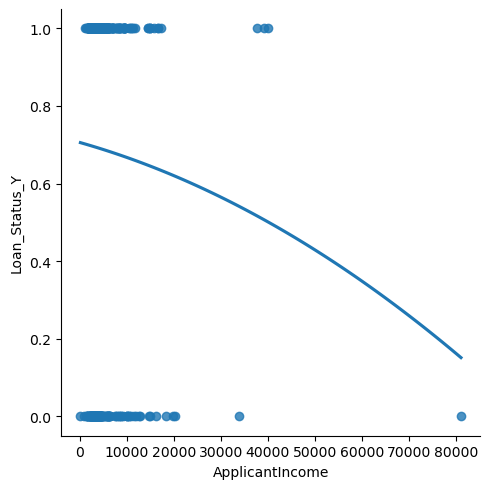

In [361]:
sns.lmplot(x="ApplicantIncome", y= "Loan_Status_Y", data= encoded3, order= 2, ci= None )
plt.show()

In [362]:
#Above: Linear Regression Model (Not going to work)

In [363]:
X= np.array(encoded3['ApplicantIncome']).reshape(-1, 1)
y= np.array(encoded3['Loan_Status_Y']).reshape(-1, 1)
encoded3.dropna(inplace= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linreg= LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))

0.005413443103071014


C:\Users\crabt\AppData\Local\Temp\ipykernel_21456\825762868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded3.dropna(inplace= True)


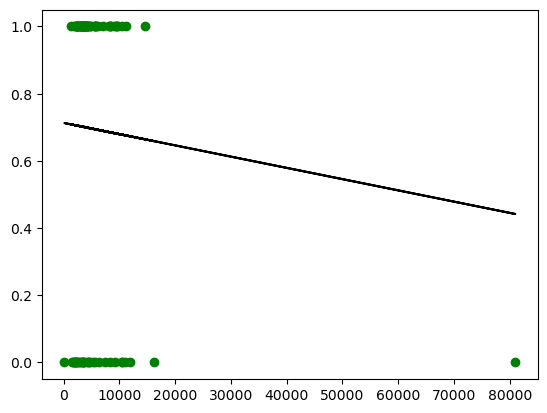

In [364]:
y_pred= linreg.predict(X_test)
plt.scatter(X_test, y_test, color= 'g')
plt.plot(X_test, y_pred, color= 'k')
plt.show()

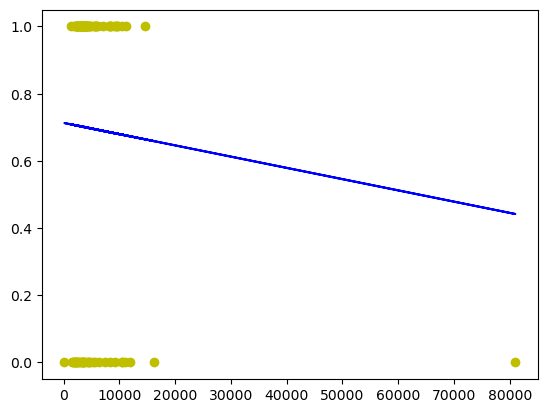

In [365]:
ypred= linreg.predict(X_test)
plt.scatter(X_test, y_test, color= 'y')
plt.plot(X_test, y_pred, color= 'b')

In [366]:
absolutee = mean_absolute_error(y_true=y_test,y_pred=y_pred)
squarede = mean_squared_error(y_true=y_test,y_pred=y_pred)
squarede2 = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print(absolutee)
print(squarede)
print(squarede2)

0.43685678969906544
0.2253457255110076
0.47470593582870607


In [367]:
#Linear Regression model invalid for analysis. The predicted and actual results are the same but the distribution of the results is not valid for linear regression model.

In [368]:
loan__data= encoded2

In [369]:
loan__data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1


In [370]:
X = loan__data[['ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = loan__data['Loan_Status_Y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [371]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [372]:
mat = metrics.confusion_matrix(y_test, y_pred)
print(mat)

[[10 27]
 [ 5 75]]


In [373]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7264957264957265


In [374]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
Accuracy = metrics.roc_auc_score(y_test, y_pred_proba)

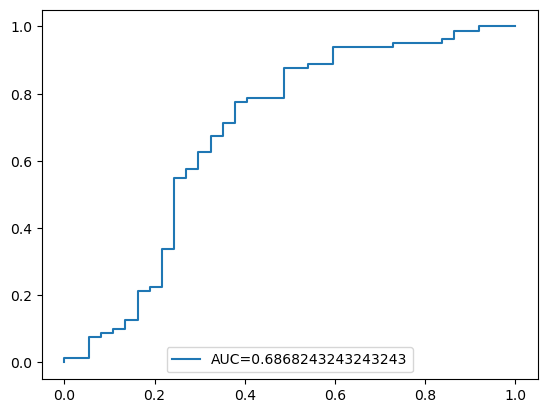

In [375]:
plt.plot(fpr,tpr,label="AUC="+str(Accuracy))
plt.legend(loc=8)
plt.show()

In [376]:
#Above: Logistic Regression and Knn both have stronger models but less accuracy than linear regression.